Import Libraries

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import random
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Functions

In [2]:
def Pre_Processing(x_train, x_test, y_train, y_test):
  x_test = x_test.reshape(x_test.shape[0], -1)
  x_train = x_train.reshape(x_train.shape[0], -1)
  x_train = x_train / 255
  x_test = x_test / 255
  y_train_new = []
  y_test_new = []
  x_train_new = []
  x_test_new = []
  for i in range(len(y_train)):
    if y_train[i] == 7:
      y_train_new.append(1)
      x_train_new.append(x_train[i])
    elif y_train[i] == 2:
      y_train_new.append(-1)
      x_train_new.append(x_train[i])
  for i in range(len(y_test)):
    if y_test[i] == 7:
      y_test_new.append(1)
      x_test_new.append(x_test[i])
    elif y_test[i] == 2:
      y_test_new.append(-1)
      x_test_new.append(x_test[i])
  return np.array(x_train_new), np.array(x_test_new), np.array(y_train_new), np.array(y_test_new)

In [3]:
def accuracy(w, b, x, y):
  accuracy = 0
  for i in range(len(x)):
    pred = np.dot(x[i], w) + b
    if pred >= 0:
      if y[i] == 1:
        accuracy += 1
    else:
      if y[i] == -1:
        accuracy += 1
  return accuracy / len(x)

In [4]:
def miu(w, b, x, y):
  return 1 / (1 + np.exp(-y * (np.dot(x, w) + b)))

In [5]:
def J_b(w, b, x, y):
  sum = 0
  for i in range(len(x)):
    sum += -(y[i] * np.exp(-y[i] * (np.dot(x[i], w) + b))) * miu(w, b, x[i], y[i])
  return sum / len(x)

In [6]:
def J_w(w, b, x, y):
  sum = 0
  for i in range(len(x)):
    sum += -(x[i] * y[i] * np.exp(-y[i] * (np.dot(x[i], w) + b))) * miu(w, b, x[i], y[i])
  return sum / len(x)

In [7]:
def J(w, b, x, y):
  sum = 0
  for i in range(len(x)):
    sum += np.log(1 + np.exp(-y[i] * (np.dot(x[i], w) + b)))
  return sum / len(x)

In [8]:
def forward(x, y, lr):
  w = np.zeros((x.shape[1]))
  b = 0
  error = []
  for i in range(100):
    w_new = w - lr * J_w(w, b, x, y)
    b_new = b - lr * J_b(w, b, x, y)
    error.append(J(w, b, x, y))
    w = w_new
    b = b_new
  return w, b, error

In [15]:
def SGD(batch, x, y, lr):
  w = np.zeros((x.shape[1]))
  b = 0
  error = []
  for i in range(100):
    batchs = random.sample(range(0, len(x)), batch)
    w_new = w - lr * J_w(w, b, x[batchs], y[batchs])
    b_new = b - lr * J_b(w, b, x[batchs], y[batchs])
    error.append(J(w, b, x, y))
    w = w_new
    b = b_new
  return w, b, error

Remove unnecessary data

In [10]:
x_train, x_test, y_train, y_test = Pre_Processing(x_train, x_test, y_train, y_test)

Gradient Descent and SGD

Text(0, 0.5, 'Error')

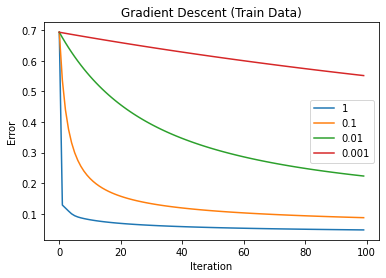

In [11]:
lr = [1, 0.1, 0.01, 0.001]
accuracy_train = []
for i in lr:
  w, b, error = forward(x_train, y_train, i)
  accuracy_train.append(accuracy(w, b, x_train, y_train))
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('Gradient Descent (Train Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

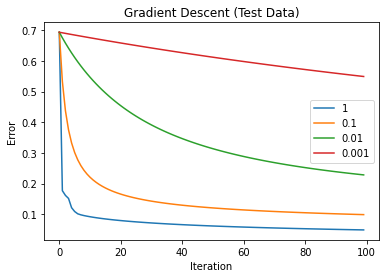

In [12]:
accuracy_test = []
for i in lr:
  w, b, error = forward(x_test, y_test, i)
  accuracy_test.append(accuracy(w, b, x_train, y_train))
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('Gradient Descent (Test Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

In [13]:
for i in range(len(lr)):
  print(f'Train Data Accuracy with lr = {lr[i]}: {accuracy_train[i] * 100:.2f}%')
  print(f'Test Data Accuracy with lr = {lr[i]}: {accuracy_test[i] * 100:.2f}%')

Train Data Accuracy with lr = 1: 98.58%
Test Data Accuracy with lr = 1: 98.09%
Train Data Accuracy with lr = 0.1: 97.55%
Test Data Accuracy with lr = 0.1: 97.51%
Train Data Accuracy with lr = 0.01: 96.65%
Test Data Accuracy with lr = 0.01: 96.69%
Train Data Accuracy with lr = 0.001: 96.15%
Test Data Accuracy with lr = 0.001: 95.84%


Text(0, 0.5, 'Error')

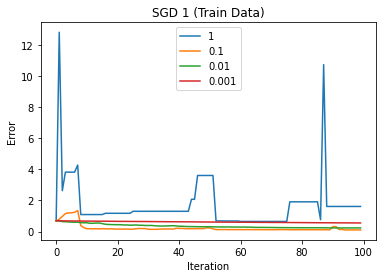

In [16]:
accuracy_train_SGD_1 = []
for i in lr:
  w, b, error = SGD(1, x_train, y_train, i)
  accuracy_train_SGD_1.append(accuracy(w, b, x_train, y_train))
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('SGD 1 (Train Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

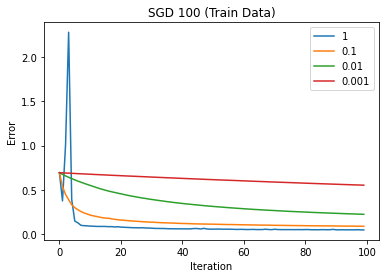

In [17]:
accuracy_train_SGD_100 = []
for i in lr:
  w, b, error = SGD(100, x_train, y_train, i)
  accuracy_train_SGD_100.append(accuracy(w, b, x_train, y_train))
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('SGD 100 (Train Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

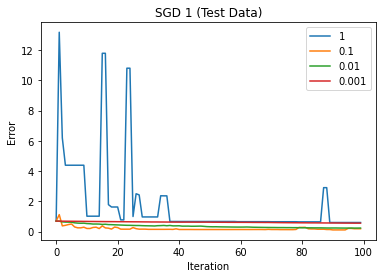

In [18]:
accuracy_test_SGD_1 = []
for i in lr:
  w, b, error = SGD(1, x_test, y_test, i)
  accuracy_test_SGD_1.append(accuracy(w, b, x_test, y_test))
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('SGD 1 (Test Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

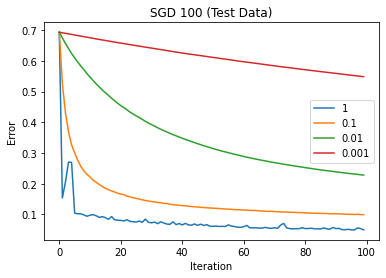

In [19]:
accuracy_test_SGD_100 = []
for i in lr:
  w, b, error = SGD(100, x_test, y_test, i)
  accuracy_test_SGD_100.append(accuracy(w, b, x_test, y_test))
  plt.plot(error)
plt.legend(['1', '0.1', '0.01', '0.001'])
plt.title('SGD 100 (Test Data)')
plt.xlabel('Iteration')
plt.ylabel('Error')

In [20]:
for i in range(len(lr)):
  print(f'SGD 1 on Train Data Accuracy with lr = {lr[i]}: {accuracy_train_SGD_1[i] * 100:.2f}%')
  print(f'SGD 1 on Test Data Accuracy with lr = {lr[i]}: {accuracy_test_SGD_1[i] * 100:.2f}%')
  print(f'SGD 100 on Train Data Accuracy with lr = {lr[i]}: {accuracy_train_SGD_100[i] * 100:.2f}%')
  print(f'SGD 100 on Test Data Accuracy with lr = {lr[i]}: {accuracy_test_SGD_100[i] * 100:.2f}%')

SGD 1 on Train Data Accuracy with lr = 1: 89.62%
SGD 1 on Test Data Accuracy with lr = 1: 77.18%
SGD 100 on Train Data Accuracy with lr = 1: 98.40%
SGD 100 on Test Data Accuracy with lr = 1: 97.82%
SGD 1 on Train Data Accuracy with lr = 0.1: 96.07%
SGD 1 on Test Data Accuracy with lr = 0.1: 95.15%
SGD 100 on Train Data Accuracy with lr = 0.1: 97.50%
SGD 100 on Test Data Accuracy with lr = 0.1: 97.23%
SGD 1 on Train Data Accuracy with lr = 0.01: 95.26%
SGD 1 on Test Data Accuracy with lr = 0.01: 95.15%
SGD 100 on Train Data Accuracy with lr = 0.01: 96.55%
SGD 100 on Test Data Accuracy with lr = 0.01: 95.87%
SGD 1 on Train Data Accuracy with lr = 0.001: 95.36%
SGD 1 on Test Data Accuracy with lr = 0.001: 95.00%
SGD 100 on Train Data Accuracy with lr = 0.001: 96.38%
SGD 100 on Test Data Accuracy with lr = 0.001: 94.47%
